In [1]:
!pip install pyqrcode
!pip install qrcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyqrcode: filename=PyQRCode-1.2.1-py3-none-any.whl size=36228 sha256=6a946d77a3616e9eceb110488fff508a2fa9d0cda8c2d9a629620eaceb3e82fd
  Stored in directory: /tmp/pip-ephem-wheel-cache-s4y5xugr/wheels/34/2d/20/082874e49a32cdcc87ebaf99dd0099fb7774ef30f010dfb6f2
Successfully built pyqrcode
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 15.3 MB/s eta 0:00:00


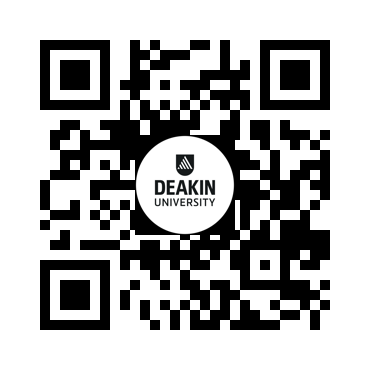

In [4]:
from PIL      import Image
from pyqrcode import QRCode 


def generate_qr(data, _logo, logo_size=10):
    qr = QRCode(
        data,
        error='H'
    ).png('temp.png', scale=10)
    
    img = Image.open('temp.png').convert('RGB')
    imgsize = img.size
    
    xmin = ymin = int((imgsize[0] / 2) - (logo_size / 2))
    xmax = ymax = int((imgsize[0] / 2) + (logo_size / 2))
    
    _logo = _logo.resize((xmax - xmin, ymax - ymin))
    img.paste(_logo, (xmin, ymin, xmax, ymax))
    return img


logo = Image.open('logo.png')
generate_qr('https://www.google.com/', logo, logo_size=100)

In [37]:
from pandas import read_csv
from os.path import exists
from os import mkdir


if not exists('./qrcodes/'):
    mkdir('qrcodes')

course_data = read_csv('course-data.csv')
urls = 'https:' + course_data.url
for course, url in zip(course_data.course_name.str.replace('/', ' '), urls):
    generate_qr(url, logo, logo_size=100).save(f'qrcodes/{course}.png')

In [5]:
# special cases
generate_qr('https://www.deakin.edu.au/about-deakin/locations/campuses/', logo, logo_size=100).save('Camp.png')
generate_qr('https://www.deakin.edu.au/student-life-and-services/student-facilities/clubs-and-societies/', logo, logo_size=100).save('Club.png')
generate_qr('https://www.deakin.edu.au/accommodation/', logo, logo_size=100).save('Cacc.png')
generate_qr('https://www.deakin.edu.au/study/', logo, logo_size=100).save('Cstu.png')
generate_qr('https://www.deakin.edu.au/study/find-a-course/', logo, logo_size=100).save('Cour.png')